In [35]:
import numpy as np
import math
import time

In [36]:
#AND GATE
def sigmoid(z):
    sig = 1 / (1 + math.exp(-z))
    return sig

In [37]:
def perceptron(x0, x1, x2, w0, w1, w2, learning_rate, y_old, count, eo, arr): 
  global i
  l = learning_rate
  Y_new = (x0*w0)+(x1*w1)+(x2*w2)
  Y_new = sigmoid(Y_new)

  error_old = eo 
  error = abs(Y_new-y_old) 

  if (count<=500):
    w0 = w0 + (x0)*(error)*(learning_rate)
    w1 = w1 + (x1)*(error)*(learning_rate)
    w2 = w2 + (x2)*(error)*(learning_rate)
    
    count = count+1
    if (i>=len(y)-1):
      i = 0
    else:
      i = i+1
    perceptron(1, x[i][0], x[i][1], w0, w1, w2, l, y[i], count, error, arr)
  
  else:
    arr.append(w0)
    arr.append(w1)
    arr.append(w2) 

In [38]:
x = np.array([
    [ 0, 0],
    [ 0, 1],
    [ 1, 0],
    [ 1, 1],
])

y = np.array([0, 1, 1, 0])

count = 0
i = 0
learning_rate = 0.05
arr = []
perceptron(1, x[i][0], x[i][1], 1, 0.2, 1, learning_rate, y[i], count, 1, arr)

print((arr[0]*1)+(arr[1]*0)+(arr[2]*0))
print((arr[0]*1)+(arr[1]*0)+(arr[2]*1))
print((arr[0]*1)+(arr[1]*1)+(arr[2]*0))
print((arr[0]*1)+(arr[1]*1)+(arr[2]*1))

13.48975606048319
20.75689436459061
20.001913572771187
27.269051876878606


In [71]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 10,0.2,-0.75
list1=[]
alpha = 0.05
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0

In [72]:
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list1.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.9999356741238166 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2809003425857055 h2 unit= 0.9999172827771453 zpre= 0.9999091529248572 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998778330481527 h2 unit= 0.6271477663703551 zpre= 0.9999405078133661 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996841728570243 h2 unit= 0.9999266357949307 zpre= 0.9999213145561177 zac= 1


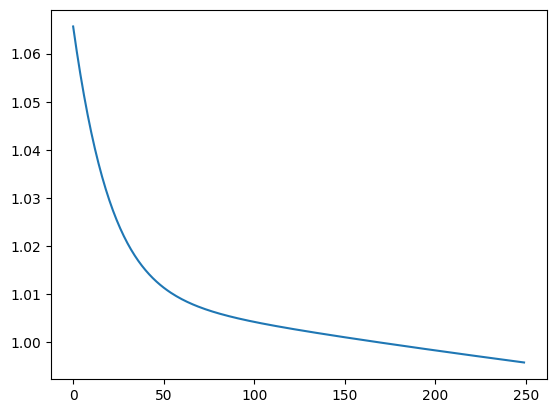

In [41]:
import matplotlib.pyplot as plt
plt.plot(list1)

In [73]:
#Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning 
#rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for 
#learning to converge against the learning rates
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 10,0.2,-0.75
list2=[]
alpha = 0.1
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list2.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue


Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.9999356741238166 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2809003425877949 h2 unit= 0.9999172827771422 zpre= 0.99990915292489 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998778330257424 h2 unit= 0.6271477664275146 zpre= 0.9999405072979113 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996841727411264 h2 unit= 0.9999266358715015 zpre= 0.9999213131265172 zac= 1


In [43]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 0.28,0.11,0.2
list3=[]
alpha = 0.2
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list3.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.6118303447414786 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2810027698536489 h2 unit= 0.9999173560232759 zpre= 0.6325035726656103 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998778084531117 h2 unit= 0.6273547915332921 zpre= 0.6210418455795331 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996838852662411 h2 unit= 0.9999265184228276 zpre= 0.6188887846733465 zac= 1
Epoch 2
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024496196875411 h2 unit= 0.598602214013097 zpre= 0.6026233837681664 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2808124962396048 h2 unit= 0.9999173218924289 zpre= 0.6224963127504533 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998777875412359 h2 unit= 0.6269681136991955 zpre= 0.6108982642007602 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996836271458952 h2 unit= 0.9999264161275832 zpre= 0.6072427727443919 zac= 1
Epoch 3
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024068170706406 h2 unit= 0.5985346283122557 zpre= 0.5941090926934726 zac= 1
x0= 1 x1= 0 x2= 1 h1 uni

In [74]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 10,0.2,-0.75
list4=[]
alpha = 0.3
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list4.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.9999356741238166 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2809003425961523 h2 unit= 0.9999172827771298 zpre= 0.9999091529250208 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998778329361007 h2 unit= 0.6271477666561525 zpre= 0.9999405052360473 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996841722775345 h2 unit= 0.999926636177806 zpre= 0.99992130740775 zac= 1


In [45]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 0.28,0.11,0.2
list5=[]
alpha = 0.4
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list5.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.6118303447414786 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.28110521987247894 h2 unit= 0.9999174292045496 zpre= 0.6399308327053611 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998777697883695 h2 unit= 0.6275617570130978 zpre= 0.6159010543946674 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996835245968988 h2 unit= 0.9999264393168935 zpre= 0.5938222899039146 zac= 1
Epoch 2
x0= 1 x1= 0 x2= 0 h1 unit= 0.5023704675307907 h2 unit= 0.5985794141878459 zpre= 0.5949912077059726 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2806694846647831 h2 unit= 0.9999173739727416 zpre= 0.6220992738084334 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998777181580774 h2 unit= 0.6268862180241801 zpre= 0.5980227753265994 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996829705368873 h2 unit= 0.9999262950787106 zpre= 0.5731951452162256 zac= 1
Epoch 3
x0= 1 x1= 0 x2= 0 h1 unit= 0.5022649033772545 h2 unit= 0.5985307425971443 zpre= 0.5806670302428484 zac= 1
x0= 1 x1= 0 x2= 1 h1 u

In [75]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 10,0.2,-0.75
list6=[]
alpha = 0.5
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list6.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.9999356741238166 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2809003426045098 h2 unit= 0.9999172827771176 zpre= 0.9999091529251518 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998778328464589 h2 unit= 0.6271477668847902 zpre= 0.9999405031741118 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996841718139419 h2 unit= 0.9999266364841455 zpre= 0.9999213016883969 zac= 1


In [47]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 0.28,0.11,0.2
list7=[]
alpha = 0.6
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list7.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.6118303447414786 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.28120769263451295 h2 unit= 0.9999175023210263 zpre= 0.647292125181052 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998777171475294 h2 unit= 0.627768662901188 zpre= 0.6106809357293504 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.999683091154381 h2 unit= 0.9999263986350934 zpre= 0.5683301156768216 zac= 1
Epoch 2
x0= 1 x1= 0 x2= 0 h1 unit= 0.5022626745361923 h2 unit= 0.598619438632331 zpre= 0.5889640271695783 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2804792121144677 h2 unit= 0.9999174409292203 zpre= 0.6236935248025515 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998776214011361 h2 unit= 0.6269077590730063 zpre= 0.5873507630608936 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.999682172416698 h2 unit= 0.9999262626001717 zpre= 0.5415120302548397 zac= 1
Epoch 3
x0= 1 x1= 0 x2= 0 h1 unit= 0.502067127665644 h2 unit= 0.598661689919587 zpre= 0.5710588670314035 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.

In [76]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 10,0.2,-0.75
list8=[]
alpha = 0.7
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list8.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.9999356741238166 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2809003426128672 h2 unit= 0.9999172827771051 zpre= 0.9999091529252828 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998778327568173 h2 unit= 0.6271477671134282 zpre= 0.999940501112105 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996841713503486 h2 unit= 0.9999266367905194 zpre= 0.9999212959684575 zac= 1


In [49]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 0.28,0.11,0.2
list9=[]
alpha = 0.8
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list9.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.6118303447414786 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.28131018813414915 h2 unit= 0.9999175753727637 zpre= 0.65458458585209 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998776506536471 h2 unit= 0.6279755093974637 zpre= 0.6054100969559684 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996825853732783 h2 unit= 0.9999263962117356 zpre= 0.5425993641159799 zac= 1
Epoch 2
x0= 1 x1= 0 x2= 0 h1 unit= 0.5021265091489728 h2 unit= 0.5987219003184426 zpre= 0.5844920539379257 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2802501552195751 h2 unit= 0.999917524905723 zpre= 0.6270736277352486 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998774949570899 h2 unit= 0.6270385410901342 zpre= 0.5786826907547716 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996812074133551 h2 unit= 0.9999263102163389 zpre= 0.5122060770320965 zac= 1
Epoch 3
x0= 1 x1= 0 x2= 0 h1 unit= 0.5018089104245875 h2 unit= 0.5989167868658342 zpre= 0.5646615796849933 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit

In [77]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 10,0.2,-0.75
list10=[]
alpha = 0.9
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list10.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.9999356741238166 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2809003426212247 h2 unit= 0.9999172827770929 zpre= 0.9999091529254137 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998778326671753 h2 unit= 0.627147767342066 zpre= 0.9999404990500266 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996841708867547 h2 unit= 0.9999266370969284 zpre= 0.9999212902479319 zac= 1


In [51]:
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 9,0.12,-0.95,9
w0,w1,w2 = 0.28,0.11,0.2
list11=[]
alpha = 1
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 250):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            e += (zpre - zac[i])**2       
    list11.append(e)
    x=x+1
    if abs( zpre - zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.6118303447414786 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2814127063657777 h2 unit= 0.9999176483598191 zpre= 0.6618054735450329 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998775704807187 h2 unit= 0.6281822967513486 zpre= 0.6001175526140426 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996820079304128 h2 unit= 0.9999264314887815 zpre= 0.516822003492303 zac= 1
Epoch 2
x0= 1 x1= 0 x2= 0 h1 unit= 0.5019623555050805 h2 unit= 0.598885860698545 zpre= 0.5814482560509383 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.2799902148575051 h2 unit= 0.9999176278447766 zpre= 0.6319718291545439 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998773374681454 h2 unit= 0.6272832814246901 zpre= 0.5717469983477926 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9996800559630156 h2 unit= 0.9999264312547793 zpre= 0.4850896799049412 zac= 1
Epoch 3
x0= 1 x1= 0 x2= 0 h1 unit= 0.5014876860989235 h2 unit= 0.5992886896753531 zpre= 0.5608060836021241 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit

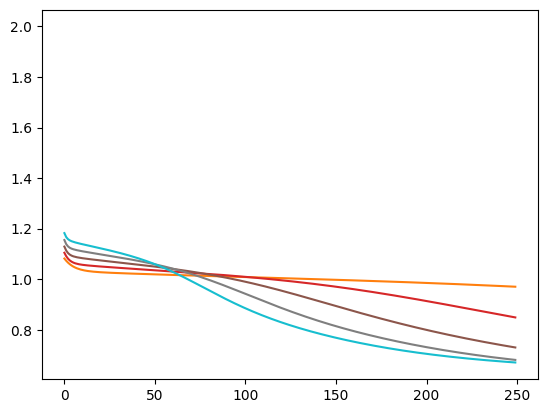

In [78]:
plt.plot(list2)
plt.plot(list3)
plt.plot(list4)
plt.plot(list5)
plt.plot(list6)
plt.plot(list7)
plt.plot(list8)
plt.plot(list9)
plt.plot(list10)
plt.plot(list11)

In [81]:
import time
import numpy as np
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 10,0.2,-0.75,0.09
w0,w1,w2 = 0.8,0.1,0.2
list12=[]
alpha = 0.05
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 1000):
    print("Epoch",x+1)
    e=0
    for i in range(0,len(x0)): 
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w0 + zpre1 * w1 + zpre2 * w2 
        zpre = 1/(1+ np.exp(-zpre3))
        if (zpre == zac[i]):
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
            continue
        else:
            fn = zpre*(1-zpre)
            deltak = fn*( (-zpre) + zac[i])
            deltah1 = zpre1*(1-zpre1)*(w1)*deltak
            deltah2 = zpre2*(1-zpre2)*(w2)*deltak
            w0 = w0 + alpha * deltak * 1
            w1 = w1 + alpha * deltak * zpre1
            w2 = w2 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre=",zpre,"zac=",zac[i])
        e += (zpre - zac[i])**2
            
    list12.append(e)
    
    x=x+1
    if ( -zpre + zac[i]) < 0.002:
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre= 0.7251170122352123 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.3230191199860532 h2 unit= 0.6201374427846136 zpre= 0.7232280441299777 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9999550496931581 h2 unit= 0.6456077606848424 zpre= 0.7353264840036419 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9999048297023055 h2 unit= 0.6656995837115735 zpre= 0.7327046321957629 zac= 1
Epoch 2
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024769823600292 h2 unit= 0.5985860729291071 zpre= 0.7220668618335901 zac= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.32296335228633477 h2 unit= 0.6199829152702216 zpre= 0.7203516005706642 zac= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9999550458148843 h2 unit= 0.6454645177447234 zpre= 0.7317700662703509 zac= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9999048070131397 h2 unit= 0.6655142823974489 zpre= 0.7290895273722555 zac= 1
Epoch 3
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024554154912076 h2 unit= 0.5984880004797107 zpre= 0.7190196626612667 zac= 1
x0= 1 x1= 0 x2= 1 h1 u

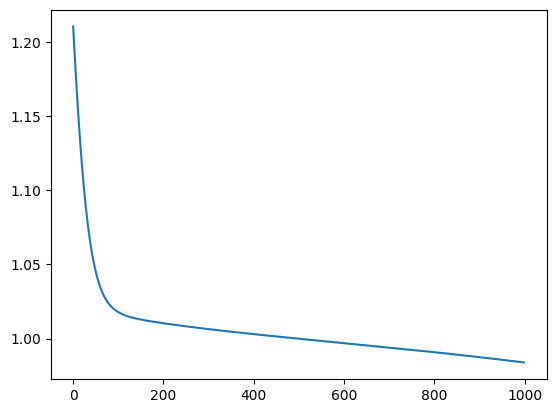

In [82]:
plt.plot(list12)

In [83]:
import time
import numpy as np
start = time.time()
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 10,0.2,-0.75,0.09
w10,w20 = 0.11,0.41
w11,w12,w21,w22 = -20,0.1,-1.2,0.7
alpha = 0.05
x0 = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
zac = [1,0,0,1]
zac1 = [0,1,1,0]
zac2 = [1,0,0,1]
zpre=0
h1 = 0
h2 = 0
zpre1,zpre2 = 0,0
x=0
while (x < 3000):
    print("Epoch",x+1)
    for i in range(0,len(x0)):
        h1= x0[i]*v10 + x1[i]*v11 + x2[i]*v21
        h2= x0[i]*v20 + x1[i]*v12 + x2[i]*v22
        zpre1 = 1/(1+ np.exp(-h1))
        zpre2 = 1/(1+ np.exp(-h2))
        zpre3 = w10 + zpre1 * w11 + zpre2 * w21
        zpre4 = w20 + zpre1 * w12 + zpre2 * w22
        zpre01 = 1/(1+ np.exp(-zpre3))
        zpre02 = 1/(1+ np.exp(-zpre4))
        if (zpre01 == zac1[i]):
            print("The Output 1")
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre01=",zpre01,"zpre02=",zpre02,"zac1=",zac1[i],"zac2=",zac2[i])
            continue
        else:
            fn = zpre01*(1-zpre01)
            deltak = fn*( -zpre01 + zac1[i])
            deltah1 = zpre1*(1-zpre1)*(w11)*deltak
            deltah2 = zpre2*(1-zpre2)*(w21)*deltak
            w10 = w10 + alpha * deltak * 1
            w11 = w11 + alpha * deltak * zpre1
            w21 = w21 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre01=",zpre01,"zpre02=",zpre02,"zac1=",zac1[i],"zac2=",zac2[i])
        if (zpre02 == zac2[i]):
            print("The Output 2")
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre01=",zpre01,"zpre02=",zpre02,"zac1=",zac1[i],"zac2=",zac2[i])
            continue
        else:
            fn = zpre02*(1-zpre02)
            deltak = fn*( -zpre01 + zac1[i])
            deltah1 = zpre1*(1-zpre1)*(w12)*deltak
            deltah2 = zpre2*(1-zpre2)*(w22)*deltak
            w20 = w20 + alpha * deltak * 1
            w21 = w21 + alpha * deltak * zpre1
            w22 = w22 + alpha * deltak * zpre2
            v10,v20 = (v10 + alpha*deltah1*x0[i]),(v20 + alpha*deltah2*x0[i])
            v11,v12,v21,v22 = (v11 + alpha*deltah1*x1[i]),(v12 + alpha*deltah2*x1[i]),(v21 + alpha*deltah1*x2[i]),(v22 + alpha*deltah2*x2[i])
            print("x0=",x0[i],"x1=",x1[i],"x2=",x2[i],"h1 unit=",zpre1,"h2 unit=",zpre2,"zpre01=",zpre01,"zpre02=",zpre02,"zac1=",zac1[i],"zac2=",zac2[i])
        
    x=x+1
    if abs(zpre01 - zac1[i]) < 0.002 and abs(zpre02 - zac2[i]) < 0.002:
        print("The error is ",abs( zpre02 - zac2[i]),abs( zpre01 - zac1[i]))
        break
    else:
        continue

Epoch 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre01= 2.350145374584114e-05 zpre02= 0.7066836432981849 zac1= 0 zac2= 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.5024999791668749 h2 unit= 0.598687660112452 zpre01= 2.350145374584114e-05 zpre02= 0.7066836432981849 zac1= 0 zac2= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.3230041424601448 h2 unit= 0.6201064226947929 zpre01= 0.0008292074575148926 zpre02= 0.70607038127656 zac1= 1 zac2= 0
x0= 1 x1= 0 x2= 1 h1 unit= 0.3230041424601448 h2 unit= 0.6201064226947929 zpre01= 0.0008292074575148926 zpre02= 0.70607038127656 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9999550558809035 h2 unit= 0.6460446826982033 zpre01= 1.063054041427025e-09 zpre02= 0.7264625199603644 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9999550558809035 h2 unit= 0.6460446826982033 zpre01= 1.063054041427025e-09 zpre02= 0.7264625199603644 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9999048624313259 h2 unit= 0.6674348604877428 zpre01= 1.0441309698774602e-09 zpre02= 0.7

x0= 1 x1= 1 x2= 0 h1 unit= 0.9998301713785552 h2 unit= 0.8330721796965228 zpre01= 1.5405724425070482e-08 zpre02= 0.9907548875738011 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9985135253293596 h2 unit= 0.8910130825429016 zpre01= 1.678971370465203e-08 zpre02= 0.9919099563506618 zac1= 0 zac2= 1
x0= 1 x1= 1 x2= 1 h1 unit= 0.9985135253293596 h2 unit= 0.8910130825429016 zpre01= 1.678971370465203e-08 zpre02= 0.9919099563506618 zac1= 0 zac2= 1
Epoch 672
x0= 1 x1= 0 x2= 0 h1 unit= 0.21090892032586236 h2 unit= 0.7506196302912013 zpre01= 0.08658449338761662 zpre02= 0.9879383997334487 zac1= 0 zac2= 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.21090892032586236 h2 unit= 0.7506196302912013 zpre01= 0.08658449338761662 zpre02= 0.9879383997334487 zac1= 0 zac2= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.029626506879880582 h2 unit= 0.83133378036882 zpre01= 0.7920916281398394 zpre02= 0.9897889772200545 zac1= 1 zac2= 0
x0= 1 x1= 0 x2= 1 h1 unit= 0.029626506879880582 h2 unit= 0.83133378036882 zpre01= 0.7920916281398394 zpre02= 0.9

x0= 1 x1= 0 x2= 0 h1 unit= 0.2759875111034323 h2 unit= 0.7739109549858496 zpre01= 0.056772043746230405 zpre02= 0.9925834836323152 zac1= 0 zac2= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.030615622483088786 h2 unit= 0.8618390943707014 zpre01= 0.9025214928483128 zpre02= 0.9939090572968813 zac1= 1 zac2= 0
x0= 1 x1= 0 x2= 1 h1 unit= 0.030615622483088786 h2 unit= 0.8618390943707014 zpre01= 0.9025214928483128 zpre02= 0.9939090572968813 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998809572124108 h2 unit= 0.8597999572273683 zpre01= 3.6954328498557716e-08 zpre02= 0.9944403973952389 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998809572124108 h2 unit= 0.8597999572273683 zpre01= 3.6954328498557716e-08 zpre02= 0.9944403973952389 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9985638489655443 h2 unit= 0.9178933900774363 zpre01= 4.1652858257430356e-08 zpre02= 0.9951995227066828 zac1= 0 zac2= 1
x0= 1 x1= 1 x2= 1 h1 unit= 0.9985638489655443 h2 unit= 0.9178933900774363 zpre01= 4.1652858257430356e-08 zpre02= 0.995

x0= 1 x1= 0 x2= 0 h1 unit= 0.3072285466928114 h2 unit= 0.783737351180753 zpre01= 0.04237727808670135 zpre02= 0.9942694781835825 zac1= 0 zac2= 1
x0= 1 x1= 0 x2= 0 h1 unit= 0.3072285466928114 h2 unit= 0.783737351180753 zpre01= 0.04237727808670135 zpre02= 0.9942694781835825 zac1= 0 zac2= 1
x0= 1 x1= 0 x2= 1 h1 unit= 0.03190089293561149 h2 unit= 0.8729148410752828 zpre01= 0.9270688584180194 zpre02= 0.9953457984350883 zac1= 1 zac2= 0
x0= 1 x1= 0 x2= 1 h1 unit= 0.03190089293561149 h2 unit= 0.8729148410752828 zpre01= 0.9270688584180194 zpre02= 0.9953457984350883 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998976608784703 h2 unit= 0.871142543096613 zpre01= 5.1381278113054074e-08 zpre02= 0.9957536737225988 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 0 h1 unit= 0.9998976608784703 h2 unit= 0.871142543096613 zpre01= 5.1381278113054074e-08 zpre02= 0.9957536737225988 zac1= 1 zac2= 0
x0= 1 x1= 1 x2= 1 h1 unit= 0.9986237379869122 h2 unit= 0.9276213791512914 zpre01= 5.849522018757519e-08 zpre02= 0.99634352315108

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [56]:
from sklearn.neural_network import MLPClassifier
X1 = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y1 = [0, 1, 1, 0]
clf1 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(9, ), random_state=1)
clf1.fit(X1, Y1)
clf1.predict([[1,0],[0,1]])

array([1, 1])

In [57]:
#Classifier
import numpy as np
import math
import time

def sigmoid(z):
    sig = 1 / (1 + math.exp(-z))
    return sig

def stepfn(z):
  if (z>0):
    return 1
  elif (z==0):
    return 0
  else:
    return 0


def perceptron(x0, x1, x2, x3, w0, w1, w2, w3, learning_rate, y_old, count, eo): 
  global i
  l = learning_rate
  Y_new = (x0*w0)+(x1*w1)+(x2*w2)+(x3*w3)
  Y_new = sigmoid(Y_new)

  error_old = eo 
  error = abs(Y_new-y_old) 
  if (count<=50):
    w0 = w0 + (x0)*(error)*(learning_rate)
    w1 = w1 + (x1)*(error)*(learning_rate)
    w2 = w2 + (x2)*(error)*(learning_rate)
    w3 = w3 + (x3)*(error)*(learning_rate)
    
    count = count+1
    if (i>=len(y)-1):
      i = 0
    else:
      i = i+1
    perceptron(1, x[i][0], x[i][1], x[i][2], w0, w1, w2, w3, l, y[i], count, error)
  
  else:

    print(w0, w1, w2, w3)

In [58]:
x = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4],
])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

count = 0
i = 0
learning_rate = 0.5


perceptron(1, x[i][0], x[i][1], x[i][2], 1, 5, -5, 10, learning_rate, y[i], count, 1)

11.0 200.0 7.5 47.5


In [59]:
import pandas as pd

In [60]:
#convert the data to pandas dataframe.
Data1 = pd.read_excel('XOR.xlsx')
data1 = pd.DataFrame(Data1)
X = []
for i in range(len(data1)):
  X.append([data1.loc[i,'X0'],data1.loc[i,'X1'],data1.loc[i,'X2']])
Y = []
for i in range(len(data1)):
  Y.append(data1.loc[i,'Z'])

0 .
1 0 0 -10.0 0.2 -0.75 0 0.0 0.0 0.0
1 0 1 -10.0 0.2 -0.75 0 0.0 0.0 0.0
1 1 0 -10.0 0.2 -0.75 0 0.0 0.0 0.0
1 1 1 -10.0 0.2 -0.75 -1 0.05 0.05 0.05
1
1 .
1 0 0 -9.95 0.25 -0.7 0 0.0 0.0 0.0
1 0 1 -9.95 0.25 -0.7 0 0.0 0.0 0.0
1 1 0 -9.95 0.25 -0.7 0 0.0 0.0 0.0
1 1 1 -9.95 0.25 -0.7 -1 0.05 0.05 0.05
1
2 .
1 0 0 -9.9 0.3 -0.65 0 0.0 0.0 0.0
1 0 1 -9.9 0.3 -0.65 0 0.0 0.0 0.0
1 1 0 -9.9 0.3 -0.65 0 0.0 0.0 0.0
1 1 1 -9.9 0.3 -0.65 -1 0.05 0.05 0.05
1
3 .
1 0 0 -9.85 0.35 -0.6 0 0.0 0.0 0.0
1 0 1 -9.85 0.35 -0.6 0 0.0 0.0 0.0
1 1 0 -9.85 0.35 -0.6 0 0.0 0.0 0.0
1 1 1 -9.85 0.35 -0.6 -1 0.05 0.05 0.05
1
4 .
1 0 0 -9.8 0.4 -0.55 0 0.0 0.0 0.0
1 0 1 -9.8 0.4 -0.55 0 0.0 0.0 0.0
1 1 0 -9.8 0.4 -0.55 0 0.0 0.0 0.0
1 1 1 -9.8 0.4 -0.55 -1 0.05 0.05 0.05
1
5 .
1 0 0 -9.75 0.45 -0.5 0 0.0 0.0 0.0
1 0 1 -9.75 0.45 -0.5 0 0.0 0.0 0.0
1 1 0 -9.75 0.45 -0.5 0 0.0 0.0 0.0
1 1 1 -9.75 0.45 -0.5 -1 0.05 0.05 0.05
1
6 .
1 0 0 -9.7 0.5 -0.45 0 0.0 0.0 0.0
1 0 1 -9.7 0.5 -0.45 0 0.0 0.0 0.0
1 1 0 -9.7

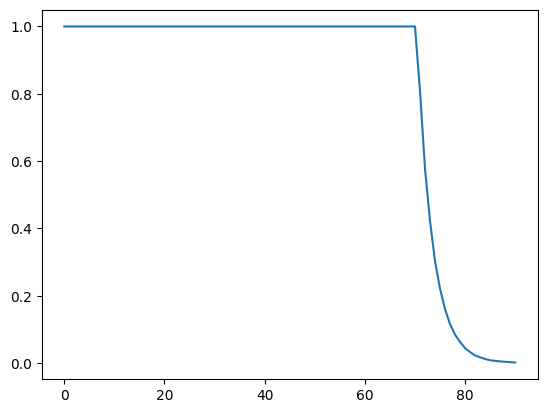

1
1
1
1
1
1
1
1
1
1
1
value of sse 0.0016
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


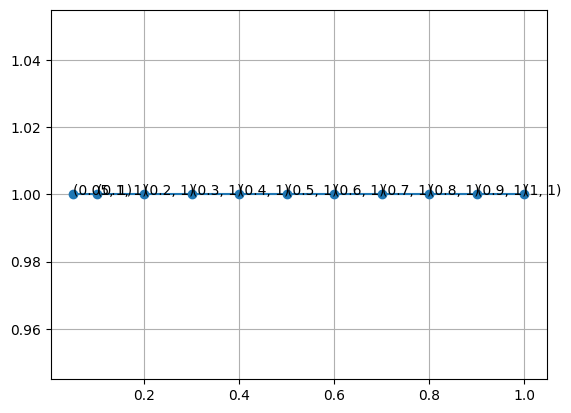

0 .
20 6 2 1 55 18 0.0 0.0 0.0 0.0
16 3 6 1.0 55.0 18.0 0.0 0.0 0.0 0.0
27 6 2 1.0 55.0 18.0 0.0 0.0 0.0 0.0
19 1 2 1.0 55.0 18.0 1.0 0.95 0.05 0.1
24 4 2 1.95 55.05 18.1 0.0 0.0 0.0 0.0
22 1 5 1.95 55.05 18.1 1.0 1.1 0.05 0.25
15 4 2 3.05 55.1 18.35 0.0 0.0 0.0 0.0
18 4 2 3.05 55.1 18.35 0.0 0.0 0.0 0.0
21 1 4 3.05 55.1 18.35 1.0 1.05 0.05 0.2
16 2 4 4.1 55.15 18.55 1.0 0.8 0.1 0.2
0.4
1 .
20 6 2 4.9 55.25 18.75 0.0 0.0 0.0 0.0
16 3 6 4.9 55.25 18.75 0.0 0.0 0.0 0.0
27 6 2 4.9 55.25 18.75 0.0 0.0 0.0 0.0
19 1 2 4.9 55.25 18.75 1.0 0.95 0.05 0.1
24 4 2 5.85 55.3 18.85 0.0 0.0 0.0 0.0
22 1 5 5.85 55.3 18.85 1.0 1.1 0.05 0.25
15 4 2 6.95 55.35 19.1 0.0 0.0 0.0 0.0
18 4 2 6.95 55.35 19.1 0.0 0.0 0.0 0.0
21 1 4 6.95 55.35 19.1 1.0 1.05 0.05 0.2
16 2 4 8.0 55.4 19.3 1.0 0.8 0.1 0.2
0.4
2 .
20 6 2 8.8 55.5 19.5 0.0 0.0 0.0 0.0
16 3 6 8.8 55.5 19.5 0.0 0.0 0.0 0.0
27 6 2 8.8 55.5 19.5 0.0 0.0 0.0 0.0
19 1 2 8.8 55.5 19.5 1.0 0.95 0.05 0.1
24 4 2 9.75 55.55 19.6 0.0 0.0 0.0 0.0
22 1 5 9.75 55.

24 4 2 360.75 78.05 87.1 0.0 0.0 0.0 0.0
22 1 5 360.75 78.05 87.1 1.0 1.1 0.05 0.25
15 4 2 361.85 78.1 87.35 0.0 0.0 0.0 0.0
18 4 2 361.85 78.1 87.35 0.0 0.0 0.0 0.0
21 1 4 361.85 78.1 87.35 1.0 1.05 0.05 0.2
16 2 4 362.9 78.15 87.55 1.0 0.8 0.1 0.2
0.4
93 .
20 6 2 363.7 78.25 87.75 0.0 0.0 0.0 0.0
16 3 6 363.7 78.25 87.75 0.0 0.0 0.0 0.0
27 6 2 363.7 78.25 87.75 0.0 0.0 0.0 0.0
19 1 2 363.7 78.25 87.75 1.0 0.95 0.05 0.1
24 4 2 364.65 78.3 87.85 0.0 0.0 0.0 0.0
22 1 5 364.65 78.3 87.85 1.0 1.1 0.05 0.25
15 4 2 365.75 78.35 88.1 0.0 0.0 0.0 0.0
18 4 2 365.75 78.35 88.1 0.0 0.0 0.0 0.0
21 1 4 365.75 78.35 88.1 1.0 1.05 0.05 0.2
16 2 4 366.8 78.4 88.3 1.0 0.8 0.1 0.2
0.4
94 .
20 6 2 367.6 78.5 88.5 0.0 0.0 0.0 0.0
16 3 6 367.6 78.5 88.5 0.0 0.0 0.0 0.0
27 6 2 367.6 78.5 88.5 0.0 0.0 0.0 0.0
19 1 2 367.6 78.5 88.5 1.0 0.95 0.05 0.1
24 4 2 368.55 78.55 88.6 0.0 0.0 0.0 0.0
22 1 5 368.55 78.55 88.6 1.0 1.1 0.05 0.25
15 4 2 369.65 78.6 88.85 0.0 0.0 0.0 0.0
18 4 2 369.65 78.6 88.85 0.0 0.0 0.

18 4 2 1492.85 150.6 304.85 0.0 0.0 0.0 0.0
21 1 4 1492.85 150.6 304.85 1.0 1.05 0.05 0.2
16 2 4 1493.9 150.65 305.05 1.0 0.8 0.1 0.2
0.4
383 .
20 6 2 1494.7 150.75 305.25 0.0 0.0 0.0 0.0
16 3 6 1494.7 150.75 305.25 0.0 0.0 0.0 0.0
27 6 2 1494.7 150.75 305.25 0.0 0.0 0.0 0.0
19 1 2 1494.7 150.75 305.25 1.0 0.95 0.05 0.1
24 4 2 1495.65 150.8 305.35 0.0 0.0 0.0 0.0
22 1 5 1495.65 150.8 305.35 1.0 1.1 0.05 0.25
15 4 2 1496.75 150.85 305.6 0.0 0.0 0.0 0.0
18 4 2 1496.75 150.85 305.6 0.0 0.0 0.0 0.0
21 1 4 1496.75 150.85 305.6 1.0 1.05 0.05 0.2
16 2 4 1497.8 150.9 305.8 1.0 0.8 0.1 0.2
0.4
384 .
20 6 2 1498.6 151.0 306.0 0.0 0.0 0.0 0.0
16 3 6 1498.6 151.0 306.0 0.0 0.0 0.0 0.0
27 6 2 1498.6 151.0 306.0 0.0 0.0 0.0 0.0
19 1 2 1498.6 151.0 306.0 1.0 0.95 0.05 0.1
24 4 2 1499.55 151.05 306.1 0.0 0.0 0.0 0.0
22 1 5 1499.55 151.05 306.1 1.0 1.1 0.05 0.25
15 4 2 1500.65 151.1 306.35 0.0 0.0 0.0 0.0
18 4 2 1500.65 151.1 306.35 0.0 0.0 0.0 0.0
21 1 4 1500.65 151.1 306.35 1.0 1.05 0.05 0.2
16 2 4 1

15 4 2 2818.85 235.6 559.85 0.0 0.0 0.0 0.0
18 4 2 2818.85 235.6 559.85 0.0 0.0 0.0 0.0
21 1 4 2818.85 235.6 559.85 1.0 1.05 0.05 0.2
16 2 4 2819.9 235.65 560.05 1.0 0.8 0.1 0.2
0.4
723 .
20 6 2 2820.7 235.75 560.25 0.0 0.0 0.0 0.0
16 3 6 2820.7 235.75 560.25 0.0 0.0 0.0 0.0
27 6 2 2820.7 235.75 560.25 0.0 0.0 0.0 0.0
19 1 2 2820.7 235.75 560.25 1.0 0.95 0.05 0.1
24 4 2 2821.65 235.8 560.35 0.0 0.0 0.0 0.0
22 1 5 2821.65 235.8 560.35 1.0 1.1 0.05 0.25
15 4 2 2822.75 235.85 560.6 0.0 0.0 0.0 0.0
18 4 2 2822.75 235.85 560.6 0.0 0.0 0.0 0.0
21 1 4 2822.75 235.85 560.6 1.0 1.05 0.05 0.2
16 2 4 2823.8 235.9 560.8 1.0 0.8 0.1 0.2
0.4
724 .
20 6 2 2824.6 236.0 561.0 0.0 0.0 0.0 0.0
16 3 6 2824.6 236.0 561.0 0.0 0.0 0.0 0.0
27 6 2 2824.6 236.0 561.0 0.0 0.0 0.0 0.0
19 1 2 2824.6 236.0 561.0 1.0 0.95 0.05 0.1
24 4 2 2825.55 236.05 561.1 0.0 0.0 0.0 0.0
22 1 5 2825.55 236.05 561.1 1.0 1.1 0.05 0.25
15 4 2 2826.65 236.1 561.35 0.0 0.0 0.0 0.0
18 4 2 2826.65 236.1 561.35 0.0 0.0 0.0 0.0
21 1 4 282

27 6 2 3651.4 289.0 720.0 0.0 0.0 0.0 0.0
19 1 2 3651.4 289.0 720.0 1.0 0.95 0.05 0.1
24 4 2 3652.35 289.05 720.1 0.0 0.0 0.0 0.0
22 1 5 3652.35 289.05 720.1 1.0 1.1 0.05 0.25
15 4 2 3653.45 289.1 720.35 0.0 0.0 0.0 0.0
18 4 2 3653.45 289.1 720.35 0.0 0.0 0.0 0.0
21 1 4 3653.45 289.1 720.35 1.0 1.05 0.05 0.2
16 2 4 3654.5 289.15 720.55 1.0 0.8 0.1 0.2
0.4
937 .
20 6 2 3655.3 289.25 720.75 0.0 0.0 0.0 0.0
16 3 6 3655.3 289.25 720.75 0.0 0.0 0.0 0.0
27 6 2 3655.3 289.25 720.75 0.0 0.0 0.0 0.0
19 1 2 3655.3 289.25 720.75 1.0 0.95 0.05 0.1
24 4 2 3656.25 289.3 720.85 0.0 0.0 0.0 0.0
22 1 5 3656.25 289.3 720.85 1.0 1.1 0.05 0.25
15 4 2 3657.35 289.35 721.1 0.0 0.0 0.0 0.0
18 4 2 3657.35 289.35 721.1 0.0 0.0 0.0 0.0
21 1 4 3657.35 289.35 721.1 1.0 1.05 0.05 0.2
16 2 4 3658.4 289.4 721.3 1.0 0.8 0.1 0.2
0.4
938 .
20 6 2 3659.2 289.5 721.5 0.0 0.0 0.0 0.0
16 3 6 3659.2 289.5 721.5 0.0 0.0 0.0 0.0
27 6 2 3659.2 289.5 721.5 0.0 0.0 0.0 0.0
19 1 2 3659.2 289.5 721.5 1.0 0.95 0.05 0.1
24 4 2 3660.

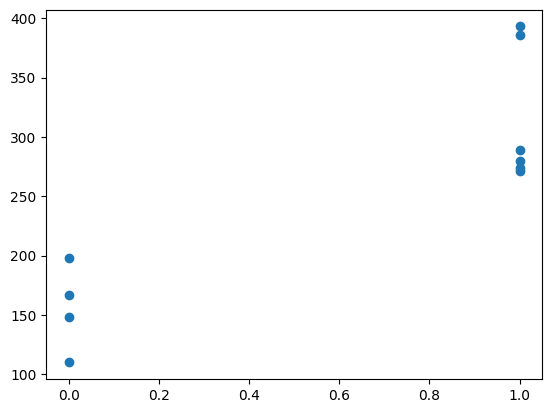

In [61]:
#Repeat the above exercises, A1 to A3, for XOR gate logic.
import numpy as np
import matplotlib.pyplot as plt
#activation function
def stepfunction(fin):
  if fin>=1:
    return 1
  else:
    return 0
def bipolar(fin):
  if fin > 0:
    return 1
  elif fin == 0:
    return 0
  else: 
    return -1
def sigmoid(fin):
  return (1/(1+(2.71)**-(fin)))
def relu(fin):
  if fin > 0:
    return fin
  else:
    return 0
def perceptron(x,w):
  yin = np.dot(x,w)
  #y = stepfunction(yin)
  #y = bipolar(yin)
  #y = sigmoid(yin)
  y = relu(yin)
  y1 = x[1]&x[2]
  e = y - y1
  return e
test1 = np.array([[1,0, 0]])
test2 = np.array([[1,0, 1]])
test3 = np.array([[1,1, 0]])
test4 = np.array([[1,1, 1]])
test = np.concatenate((test1,test2,test3,test4), axis=0)
sse_arr = []
epoch_array = []
w = np.array([-10,0.2,-0.75])
alpha = 0.05
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
e = 1
j = 0
sse = 1
while (j <1000 and sse>0.002 and sse!=float('inf')):
  epoch_array.append(j)
  print(j,".")
  sse = 0
  for i in range(4):
    e = round(perceptron(test[i],w),2)
    w0 = w[0] + alpha*abs(e)*test[i][0]
    w1 = w[1] + alpha*abs(e)*test[i][1]
    w2 = w[2] + alpha*abs(e)*test[i][2]
    print(test[i][0],test[i][1],test[i][2], round(w[0],2), round(w[1],2), round(w[2],2), e, round(alpha*abs(e)*test[i][0],3),round(alpha*abs(e)*test[i][1],3),round(alpha*abs(e)*test[i][2],3))
    w = np.array([w0,w1,w2])
    sse = sse + e**2
  sse_arr.append(sse)  
  print(sse)
  j = j + 1

print("value of sse",sse)
#scatter plot no. of epochs vs sse using Relu
plt.plot(epoch_array,sse_arr)
plt.show()
sse_arr = []
epoch_array = []
w = np.array([-10,0.2,-0.75])
alpha = 0.05
alpha_values = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
iteration_meter = []
for k in alpha_values:
    j = 0
    while (j <1000 and sse>0.002 and sse!=float('inf')):
        sse = 0
        for i in range(4):
          e = round(perceptron(test[i],w),2)
          w0 = w[0] + alpha*abs(e)*test[i][0]
          w1 = w[1] + alpha*abs(e)*test[i][1]
          w2 = w[2] + alpha*abs(e)*test[i][2]
          w = np.array([w0,w1,w2])
          sse = sse + e**2  
    j = j + 1
    print(j)
    iteration_meter.append(j)

print("value of sse",sse)
plt.plot(alpha_values,iteration_meter,'-o')
print(iteration_meter)
plt.grid(True)
for i,j in zip(alpha_values,iteration_meter):
  plt.text(i, j, '({}, {})'.format(i, j))
plt.show()
def perceptron_customer(x,w,i):
  #y0 = np.array([386,289,393,110,280,167,271,274,148,198])
  y0 = np.array([1,1,1,0,1,0,1,1,0,0])
  yin = np.dot(x,w)
  #y = stepfunction(yin)
  #y = bipolar(yin)
  y = sigmoid(yin)
  #y = relu(yin)
  #print(y)
  y1 = y0[i]
  #print(y1)
  e = y - y1
  #print(e)
  return e
customers = np.array([[20,6, 2],[16,3,6],[27,6,2],[19,1,2],[24,4,2],[22,1,5],[15,4,2],[18,4,2],[21,1,4],[16,2,4]])
w = np.array([1,55,18])
alpha = 0.05
e = 1
j = 0
sse = 1
while (j <1000 and sse>0.002):
  print(j,".")
  sse = 0
  for i in range(10):
    e = round(perceptron_customer(customers[i],w,i),2)
    w0 = w[0] + alpha*abs(e)*customers[i][0]
    w1 = w[1] + alpha*abs(e)*customers[i][1]
    w2 = w[2] + alpha*abs(e)*customers[i][2]
    print(customers[i][0],customers[i][1],customers[i][2], round(w[0],2), round(w[1],2), round(w[2],2), e, round(alpha*abs(e)*customers[i][0],3),round(alpha*abs(e)*customers[i][1],3),round(alpha*abs(e)*customers[i][2],3))
    w = np.array([w0,w1,w2])
    sse = sse + e
  sse = sse/10  
  print(sse)
  j = j + 1
y0 = [1,1,1,0,1,0,1,1,0,0]
y1 = [386,289,393,110,280,167,271,274,148,198]

plt.scatter(y0,y1)
plt.show()

In [62]:
import numpy as np

In [63]:
A = np.matrix([x0,x1,x2])

In [64]:
A = A.transpose()

In [65]:
A_inv_df = pd.DataFrame(A)

In [66]:
A_inv_df

0  1  2
0  1  0  0
1  1  0  1
2  1  1  0
3  1  1  1

In [67]:
inv = np.linalg.pinv(A)

In [68]:
x0 = np.array(inv[0])
x1 = np.array(inv[1])
x2 = np.array(inv[2])
x1[0]

array([-0.5, -0.5,  0.5,  0.5])